In [10]:
from sklearn import tree
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

In [11]:
# path = '/Users/aqian/Downloads/'
# #path = 'M:/Edmund'
# os.chdir(path)
df = pd.read_csv("../../NRD 2013 (machine learning).csv")
df.head()

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Iage_group_1,_Iage_group_2,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4
0,0,89,1,0.0,1.071937,5.0,3,1,372,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,1,89,1,0.0,1.071937,1.0,6,2,853,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
2,2,89,0,0.0,1.071937,5.0,9,3,853,30,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,48,0,0.0,3.063669,1.0,6,2,330,30,...,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,65,0,0.0,1.919980,1.0,5,2,387,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
# List all of the column names
print(df.columns.values)

['index' 'age' 'aweekend' 'died' 'discwt' 'dispuniform' 'dmonth' 'dqtr'
 'drg' 'drgver' 'drg_nopoa' 'dx1' 'dx2' 'dx3' 'dx4' 'dx5' 'dx6' 'dx7'
 'dx8' 'dx9' 'dx10' 'dx11' 'dx12' 'dx13' 'dx14' 'dx15' 'dx16' 'dx17'
 'dx18' 'dx19' 'dx20' 'dx21' 'dx22' 'dx23' 'dx24' 'dx25' 'dxccs1' 'dxccs2'
 'dxccs3' 'dxccs4' 'dxccs5' 'dxccs6' 'dxccs7' 'dxccs8' 'dxccs9' 'dxccs10'
 'dxccs11' 'dxccs12' 'dxccs13' 'dxccs14' 'dxccs15' 'dxccs16' 'dxccs17'
 'dxccs18' 'dxccs19' 'dxccs20' 'dxccs21' 'dxccs22' 'dxccs23' 'dxccs24'
 'dxccs25' 'elective' 'female' 'hcup_ed' 'hosp_nrd' 'key_nrd' 'los' 'mdc'
 'mdc_nopoa' 'nchronic' 'ndx' 'necode' 'npr' 'nrd_daystoevent'
 'nrd_stratum' 'nrd_visitlink' 'orproc' 'pay1' 'pl_nchs' 'pr1' 'pr2' 'pr3'
 'pr4' 'pr5' 'pr6' 'pr7' 'pr8' 'pr9' 'pr10' 'pr11' 'pr12' 'pr13' 'pr14'
 'pr15' 'prccs1' 'prccs2' 'prccs3' 'prccs4' 'prccs5' 'prccs6' 'prccs7'
 'prccs8' 'prccs9' 'prccs10' 'prccs11' 'prccs12' 'prccs13' 'prccs14'
 'prccs15' 'rehabtransfer' 'resident' 'samedayevent' 'totchg' 'year'
 'zip

In [13]:
# Check the top 15 rows
df.head(15)

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Iage_group_1,_Iage_group_2,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4
0,0,89,1,0.0,1.071937,5.0,3,1,372,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,1,89,1,0.0,1.071937,1.0,6,2,853,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
2,2,89,0,0.0,1.071937,5.0,9,3,853,30,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,48,0,0.0,3.063669,1.0,6,2,330,30,...,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,65,0,0.0,1.919980,1.0,5,2,387,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
5,5,66,0,0.0,2.242874,1.0,6,2,309,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
6,6,66,0,0.0,1.919980,6.0,8,3,386,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
7,7,66,0,0.0,1.919980,6.0,9,3,329,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
8,8,66,1,0.0,1.919980,6.0,10,4,862,31,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
9,9,51,0,0.0,2.958993,1.0,3,1,354,30,...,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0


In [14]:
# Make a copy of the dataframe
df_copy = df.copy()
df_copy.head(15)

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Iage_group_1,_Iage_group_2,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4
0,0,89,1,0.0,1.071937,5.0,3,1,372,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,1,89,1,0.0,1.071937,1.0,6,2,853,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
2,2,89,0,0.0,1.071937,5.0,9,3,853,30,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,48,0,0.0,3.063669,1.0,6,2,330,30,...,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,65,0,0.0,1.919980,1.0,5,2,387,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
5,5,66,0,0.0,2.242874,1.0,6,2,309,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
6,6,66,0,0.0,1.919980,6.0,8,3,386,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
7,7,66,0,0.0,1.919980,6.0,9,3,329,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
8,8,66,1,0.0,1.919980,6.0,10,4,862,31,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
9,9,51,0,0.0,2.958993,1.0,3,1,354,30,...,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0


In [15]:
# Check the back end of the data
df_copy.tail(15)

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Iage_group_1,_Iage_group_2,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4
94483,94483,66,0,0.0,1.814426,1.0,5,2,544,30,...,0,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0
94484,94484,66,1,0.0,1.814426,1.0,5,2,543,30,...,0,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0
94485,94485,66,0,0.0,1.814426,6.0,6,2,543,30,...,0,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0
94486,94486,67,1,0.0,1.814426,6.0,7,3,543,30,...,0,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0
94487,94487,67,0,0.0,1.814426,6.0,8,3,543,30,...,0,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0
94488,94488,67,1,0.0,1.814426,6.0,8,3,542,30,...,0,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0
94489,94489,67,0,0.0,1.814426,1.0,9,3,543,30,...,0,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0
94490,94490,67,0,0.0,1.814426,5.0,12,4,490,31,...,0,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0
94491,94491,32,1,0.0,1.625102,1.0,4,2,775,30,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
94492,94492,54,0,0.0,1.995433,1.0,3,1,345,30,...,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0


In [16]:
# Check the data 
# Looks like the ibd_readm variables contains "NA" values

df_copy[['nrd_visitlink','ibd_index_hosp', 'dx1', 'new_mi_adm', 'ibd_readm']].head(25)

,nrd_visitlink,ibd_index_hosp,dx1,new_mi_adm,ibd_readm
0,00017u,1,00845,0,0
1,00017u,0,0389,0,1
2,00017u,0,03842,0,1
3,0004o5,1,5559,0,0
4,000dbz,1,5559,0,0
5,000dbz,0,42731,0,1
6,000dbz,0,5559,0,1
7,000dbz,0,5552,0,1
8,000dbz,0,99859,0,1
9,000mgu,1,55221,0,0


In [17]:
# # Recoding the ibd_readm outcome variable
# readm_set = set()
# for row in df_copy.itertuples():
#     if row.ibd_readm == 1:
#         readm_set.add(row.nrd_visitlink)
        
# readm_list = list(readm_set)

# df_copy.loc[df_copy.nrd_visitlink.isin(readm_list), 'ibd_readm'] = '1'
# df_copy[['nrd_visitlink','ibd_index_hosp', 'ibd_readm']].head(25)

# Recoding the ibd_readm outcome variable
readm_set = set()
for index, row in df_copy[['nrd_visitlink','ibd_readm']].iterrows():
    if row[1] == 1:
        readm_set.add(row[0])
        
readm_list = list(readm_set)

df_copy.loc[df_copy.nrd_visitlink.isin(readm_list), 'ibd_readm'] = '1'
df_copy[['nrd_visitlink','ibd_index_hosp', 'ibd_readm']].head(25)

,nrd_visitlink,ibd_index_hosp,ibd_readm
0,00017u,1,1
1,00017u,0,1
2,00017u,0,1
3,0004o5,1,0
4,000dbz,1,1
5,000dbz,0,1
6,000dbz,0,1
7,000dbz,0,1
8,000dbz,0,1
9,000mgu,1,0


In [18]:
# df_copy['ibd_readm'] = df_copy['ibd_readm'].fillna(0)

df_copy[['nrd_visitlink', 'pay1', 'ibd_index_hosp', 'ibd_readm']].head(25)

,nrd_visitlink,pay1,ibd_index_hosp,ibd_readm
0,00017u,1.0,1,1
1,00017u,1.0,0,1
2,00017u,1.0,0,1
3,0004o5,3.0,1,0
4,000dbz,1.0,1,1
5,000dbz,1.0,0,1
6,000dbz,1.0,0,1
7,000dbz,1.0,0,1
8,000dbz,1.0,0,1
9,000mgu,3.0,1,0


In [19]:
# Number of index hospitalizations
index_hosp_counts = df_copy['ibd_index_hosp'].value_counts()
index_hosp_counts

1    47402
0    47096
Name: ibd_index_hosp, dtype: int64

In [20]:
# Number of readmissions within six months
readm_counts = df_copy['ibd_readm'].value_counts()
readm_counts

1    64373
0    30125
Name: ibd_readm, dtype: int64

In [21]:
# Filter the data so that only patients with an index hospitalizations are in a DataFrame
readm_data_df = df_copy.loc[df_copy["ibd_index_hosp"] == 1, :]

# Check to ensure the filter worked correctly
readm_data_df["ibd_index_hosp"].count()

47402

In [22]:
# # Number of rows with null values
# readm_data_df.isna().sum()

In [14]:
# Drop all rows with null values
# readm_data_df_clean = readm_data_df.dropna(axis='columns')

# # Check the data
# print(readm_data_df["ibd_index_hosp"].count())
# print('-' * 15)

# # Check the data 
# print(readm_data_df.head(15))
# print('-' * 15)

# # Check the data 
# print(readm_data_df.tail(15))
# print('-' * 15)

In [15]:
print(readm_data_df.columns.values)
# readm_data_df_clean

['index' 'age' 'aweekend' 'died' 'discwt' 'dispuniform' 'dmonth' 'dqtr'
 'drg' 'drgver' 'drg_nopoa' 'dx1' 'dx2' 'dx3' 'dx4' 'dx5' 'dx6' 'dx7'
 'dx8' 'dx9' 'dx10' 'dx11' 'dx12' 'dx13' 'dx14' 'dx15' 'dx16' 'dx17'
 'dx18' 'dx19' 'dx20' 'dx21' 'dx22' 'dx23' 'dx24' 'dx25' 'dxccs1' 'dxccs2'
 'dxccs3' 'dxccs4' 'dxccs5' 'dxccs6' 'dxccs7' 'dxccs8' 'dxccs9' 'dxccs10'
 'dxccs11' 'dxccs12' 'dxccs13' 'dxccs14' 'dxccs15' 'dxccs16' 'dxccs17'
 'dxccs18' 'dxccs19' 'dxccs20' 'dxccs21' 'dxccs22' 'dxccs23' 'dxccs24'
 'dxccs25' 'elective' 'female' 'hcup_ed' 'hosp_nrd' 'key_nrd' 'los' 'mdc'
 'mdc_nopoa' 'nchronic' 'ndx' 'necode' 'npr' 'nrd_daystoevent'
 'nrd_stratum' 'nrd_visitlink' 'orproc' 'pay1' 'pl_nchs' 'pr1' 'pr2' 'pr3'
 'pr4' 'pr5' 'pr6' 'pr7' 'pr8' 'pr9' 'pr10' 'pr11' 'pr12' 'pr13' 'pr14'
 'pr15' 'prccs1' 'prccs2' 'prccs3' 'prccs4' 'prccs5' 'prccs6' 'prccs7'
 'prccs8' 'prccs9' 'prccs10' 'prccs11' 'prccs12' 'prccs13' 'prccs14'
 'prccs15' 'rehabtransfer' 'resident' 'samedayevent' 'totchg' 'year'
 'zip

In [16]:
# List of all the variables in the dataset
['age',
 'female',
 'los',
 'aweekend',
 'elective',
 'orproc',
 'hosp_urban_rural_location',
 'payer',
 'zipinc_qrtl',
 'severe_IBD_hospitalization',
 'cm_aids',
 'cm_alcohol',
 'cm_anemdef',
 'cm_arth',
 'cm_bldloss',
 'cm_chf',
 'cm_chrnlung',
 'cm_depress',
 'cm_coag',
 'cm_dm',
 'cm_dmcx',
 'cm_drug',
 'cm_htn_c',
 'cm_hypothy',
 'cm_liver',
 'cm_lymph',
 'cm_lytes',
 'cm_mets',
 'cm_neuro',
 'cm_obese',
 'cm_para',
 'cm_perivasc',
 'cm_psych',
 'cm_pulmcirc',
 'cm_renlfail',
 'cm_tumor',
 'cm_ulcer',
 'cm_valve',
 'cm_wghtloss',
 'diabetes',
 'copd',
 'cm_smoking',
 'blood_transfusion',
 'ibd_procedures',
 'cc_index',
 'new_cc_index',
 'fractures',
 'thromboses',
 'unplanned_adm',
 'pq1_dm_short',
 'pq2_perf_appendix',
 'pq3_dm_long',
 'pq5_copd_asthma',
 'pq7_htn',
 'pq8_chf',
 'pq10_dehydrate',
 'pq11_bacterialpna',
 'pq12_uti',
 'pq13_angina',
 'pq14_diabeteswocomp',
 'pq15_asthma',
 'pq16_dm_amputate',
 'new_mi_adm',
 'new_chf_adm',
 'new_unstableangina_adm',
 'new_arrhythmia_adm',
 'new_cardiacarrest_adm',
 'new_meningitis_adm',
 'new_encephalitis_adm',
 'new_endocarditis_adm',
 'new_pneumonia_adm',
 'new_pyelonephritis_adm',
 'new_osteo_adm',
 'new_septicemia_adm',
 'new_cdiff_adm',
 'new_tb_adm',
 'new_atypicalmyco_adm',
 'new_fungal_adm',
 'new_listeriosis_adm',
 'new_leishmaniasis_adm',
 'new_pcp_adm',
 'chronic_pain',
 'ibd_surgery_adm',
 'frailty_risk_score',
 'frailty_risk_category',
 'frailty_risk_category_index',
 'h_contrl',
 'hosp_bedsize',
 'hosp_ur_teach',
 'hosp_urcat4',
 'prevent_readm',
 'cardiac_adm',
 'cvd_adm',
 'resp_adm',
 'infxn_adm',
 'gu_adm',
 'gi_adm',
 'endo_adm',
 'neuro_adm',
 'malignancies_adm',
 'fracture_adm',
 'thrombosis_adm',
 'ibd_specific_adm',
 'others_adm']

['age',
 'female',
 'los',
 'aweekend',
 'elective',
 'orproc',
 'hosp_urban_rural_location',
 'payer',
 'zipinc_qrtl',
 'severe_IBD_hospitalization',
 'cm_aids',
 'cm_alcohol',
 'cm_anemdef',
 'cm_arth',
 'cm_bldloss',
 'cm_chf',
 'cm_chrnlung',
 'cm_depress',
 'cm_coag',
 'cm_dm',
 'cm_dmcx',
 'cm_drug',
 'cm_htn_c',
 'cm_hypothy',
 'cm_liver',
 'cm_lymph',
 'cm_lytes',
 'cm_mets',
 'cm_neuro',
 'cm_obese',
 'cm_para',
 'cm_perivasc',
 'cm_psych',
 'cm_pulmcirc',
 'cm_renlfail',
 'cm_tumor',
 'cm_ulcer',
 'cm_valve',
 'cm_wghtloss',
 'diabetes',
 'copd',
 'cm_smoking',
 'blood_transfusion',
 'ibd_procedures',
 'cc_index',
 'new_cc_index',
 'fractures',
 'thromboses',
 'unplanned_adm',
 'pq1_dm_short',
 'pq2_perf_appendix',
 'pq3_dm_long',
 'pq5_copd_asthma',
 'pq7_htn',
 'pq8_chf',
 'pq10_dehydrate',
 'pq11_bacterialpna',
 'pq12_uti',
 'pq13_angina',
 'pq14_diabeteswocomp',
 'pq15_asthma',
 'pq16_dm_amputate',
 'new_mi_adm',
 'new_chf_adm',
 'new_unstableangina_adm',
 'new_arrhythmia

### Grabbing the features

In [23]:
# Grab the features

# data = readm_data_df[['age', 'zipinc_qrtl', 'female', 'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 
#                       'hosp_ur_teach', 'aweekend', 'elective', 'los', 'payer', 'cc_index', 'frailty_risk_score', 
#                       'prevent_readm', 'cardiac_adm', 'cvd_adm', 'resp_adm', 'infxn_adm', 'gu_adm', 'gi_adm', 'endo_adm', 
#                       'neuro_adm', 'malignancies_adm', 'fracture_adm', 'thrombosis_adm', 'ibd_specific_adm', 'others_adm',
#                       'severe_IBD_hospitalization', 'ibd_readm']]

# data = readm_data_df[['age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'cc_index', 'ibd_readm']]

# data = readm_data_df[['age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'ibd_specific_adm', 'infxn_adm', 'new_cdiff_adm',
#                       'hosp_bedsize', 'h_contrl', 'payer', 'cc_index', 'hosp_urcat4', 'ibd_readm']]

# data = readm_data_df[['ibd_readm','age', 'female', 'los', 'aweekend', 'payer', 'zipinc_qrtl',
#        'cm_anemdef', 'cm_chrnlung', 'cm_depress', 'cm_htn_c',
#        'cm_hypothy', 'cm_lytes', 'cm_obese', 'cm_psych', 'cm_wghtloss',
#        'diabetes', 'cm_smoking', 'blood_transfusion', 'ibd_procedures',
#        'cc_index', 'frailty_risk_score']]

# data = readm_data_df[['ibd_readm','age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'payer', 'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 'hosp_ur_teach', 'cc_index', 'female', 'cm_htn_c', 'ibd_procedures', 'cm_smoking', 'aweekend', 'cm_anemdef', 'ibd_specific_adm', 'cm_lytes', 'new_cc_index', 'orproc']] score = 61.7

# data = readm_data_df[['ibd_readm','age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'payer', 'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 'hosp_ur_teach', 'cc_index', 'female', 'cm_htn_c', 'ibd_procedures', 'cm_smoking', 'aweekend', 'cm_anemdef', 'ibd_specific_adm', 'cm_lytes', 'cm_depress', 'orproc']] score = 61.9

# data = readm_data_df[['ibd_readm','age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'payer', 'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 'hosp_ur_teach', 'cc_index', 'female', 'cm_htn_c', 'ibd_procedures', 'cm_smoking', 'aweekend', 'cm_obese', 'ibd_specific_adm', 'cm_lytes', 'cm_depress', 'orproc' ]] score = 62.1

data = readm_data_df[['ibd_readm','age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'payer', 'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 'hosp_ur_teach', 'cc_index', 'female', 'cm_htn_c', 'ibd_procedures', 'cm_smoking', 'aweekend', 'ibd_specific_adm', 'diabetes', 'cm_depress', 'orproc', 'thromboses']] #score = 62.4

# data = readm_data_df[['ibd_readm','age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'payer', 'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 'hosp_ur_teach', 'cc_index', 'female', 'ibd_surgery_adm', 'ibd_procedures', 'cm_smoking', 'thromboses', 'severe_IBD_hospitalization', 'ibd_specific_adm', 'diabetes', 'cm_depress', 'orproc' ]]

# data = readm_data_df[['ibd_readm','age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'payer', 'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 'hosp_ur_teach', 'cc_index', 'female', 'cm_htn_c', 'ibd_procedures', 'cm_smoking', 'aweekend', 'cm_obese', 'ibd_specific_adm', 'cm_lytes', 'cm_depress', 'orproc' ]]

# data = readm_data_df[['ibd_readm',
#  'age',
#  'female',
#  'los',
#  'aweekend',
#  'elective',
#  'orproc',
#  'hosp_urban_rural_location',
#  'payer',
#  'zipinc_qrtl',
#  'severe_IBD_hospitalization',
#  'cm_aids',
#  'cm_alcohol',
#  'cm_anemdef',
#  'cm_arth',
#  'cm_bldloss',
#  'cm_chf',
#  'cm_chrnlung',
#  'cm_depress',
#  'cm_coag',
#  'cm_dm',
#  'cm_dmcx',
#  'cm_drug',
#  'cm_htn_c',
#  'cm_hypothy',
#  'cm_liver',
#  'cm_lymph',
#  'cm_lytes',
#  'cm_mets',
#  'cm_neuro',
#  'cm_obese',
#  'cm_para',
#  'cm_perivasc',
#  'cm_psych',
#  'cm_pulmcirc',
#  'cm_renlfail',
#  'cm_tumor',
#  'cm_ulcer',
#  'cm_valve',
#  'cm_wghtloss',
#  'diabetes',
#  'copd',
#  'cm_smoking',
#  'blood_transfusion',
#  'ibd_procedures',
#  'cc_index',
#  'new_cc_index',
#  'fractures',
#  'thromboses',
#  'unplanned_adm',
#  'pq1_dm_short',
#  'pq2_perf_appendix',
#  'pq3_dm_long',
#  'pq5_copd_asthma',
#  'pq7_htn',
#  'pq8_chf',
#  'pq10_dehydrate',
#  'pq11_bacterialpna',
#  'pq12_uti',
#  'pq13_angina',
#  'pq14_diabeteswocomp',
#  'pq15_asthma',
#  'pq16_dm_amputate',
#  'new_mi_adm',
#  'new_chf_adm',
#  'new_unstableangina_adm',
#  'new_arrhythmia_adm',
#  'new_cardiacarrest_adm',
#  'new_meningitis_adm',
#  'new_encephalitis_adm',
#  'new_endocarditis_adm',
#  'new_pneumonia_adm',
#  'new_pyelonephritis_adm',
#  'new_osteo_adm',
#  'new_septicemia_adm',
#  'new_cdiff_adm',
#  'new_tb_adm',
#  'new_atypicalmyco_adm',
#  'new_fungal_adm',
#  'new_listeriosis_adm',
#  'new_leishmaniasis_adm',
#  'new_pcp_adm',
#  'chronic_pain',
#  'ibd_surgery_adm',
#  'frailty_risk_score',
#  'frailty_risk_category_index',
#  'h_contrl',
#  'hosp_bedsize',
#  'hosp_ur_teach',
#  'hosp_urcat4',
#  'prevent_readm',
#  'cardiac_adm',
#  'cvd_adm',
#  'resp_adm',
#  'infxn_adm',
#  'gu_adm',
#  'gi_adm',
#  'endo_adm',
#  'neuro_adm',
#  'malignancies_adm',
#  'fracture_adm',
#  'thrombosis_adm',
#  'ibd_specific_adm',
#  'others_adm']]

cleaned_data = data.dropna(axis='rows')
cleaned_data

,ibd_readm,age,frailty_risk_score,los,zipinc_qrtl,payer,hosp_bedsize,h_contrl,hosp_urcat4,hosp_ur_teach,...,female,cm_htn_c,ibd_procedures,cm_smoking,aweekend,ibd_specific_adm,diabetes,cm_depress,orproc,thromboses
0,1,89,4.7,4,4.0,1.0,3,1,1,1,...,0,1,0,1,1,0,0,0,0,0
3,0,48,0.5,4,3.0,2.0,3,1,2,1,...,1,0,1,1,0,1,0,0,1,0
4,1,65,5.7,5,2.0,1.0,2,2,2,1,...,0,1,0,1,0,1,0,0,0,0
9,0,51,2.8,3,4.0,2.0,2,2,2,1,...,0,0,0,1,0,0,0,0,1,0
10,0,22,3.8,6,2.0,1.0,3,2,2,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94491,0,32,0.0,3,4.0,2.0,2,2,1,1,...,1,0,0,0,1,0,0,0,0,0
94492,0,54,0.0,4,4.0,2.0,3,2,1,1,...,0,0,1,0,0,0,0,0,1,0
94493,1,44,0.0,9,4.0,2.0,3,2,1,1,...,0,0,1,0,0,1,0,0,1,0
94496,0,52,1.5,2,1.0,1.0,3,2,2,0,...,1,1,0,0,0,0,1,1,1,0


In [24]:
# Correlation matrix
corrMatrix = data.corr()
print(corrMatrix)

                         age  frailty_risk_score       los  zipinc_qrtl  \
age                 1.000000            0.362390  0.066278     0.040667   
frailty_risk_score  0.362390            1.000000  0.297862    -0.034033   
los                 0.066278            0.297862  1.000000    -0.022854   
zipinc_qrtl         0.040667           -0.034033 -0.022854     1.000000   
payer              -0.417895           -0.221984 -0.062497     0.043966   
hosp_bedsize       -0.037066           -0.003623  0.049362    -0.046114   
h_contrl            0.057608            0.027844 -0.012074    -0.056592   
hosp_urcat4         0.041243            0.011360 -0.051234    -0.305578   
hosp_ur_teach      -0.049051           -0.031732  0.006986    -0.132343   
cc_index            0.325557            0.278504  0.122473    -0.018003   
female              0.021296            0.040058 -0.024857    -0.025209   
cm_htn_c            0.469228            0.183281  0.027163    -0.044202   
ibd_procedures     -0.097

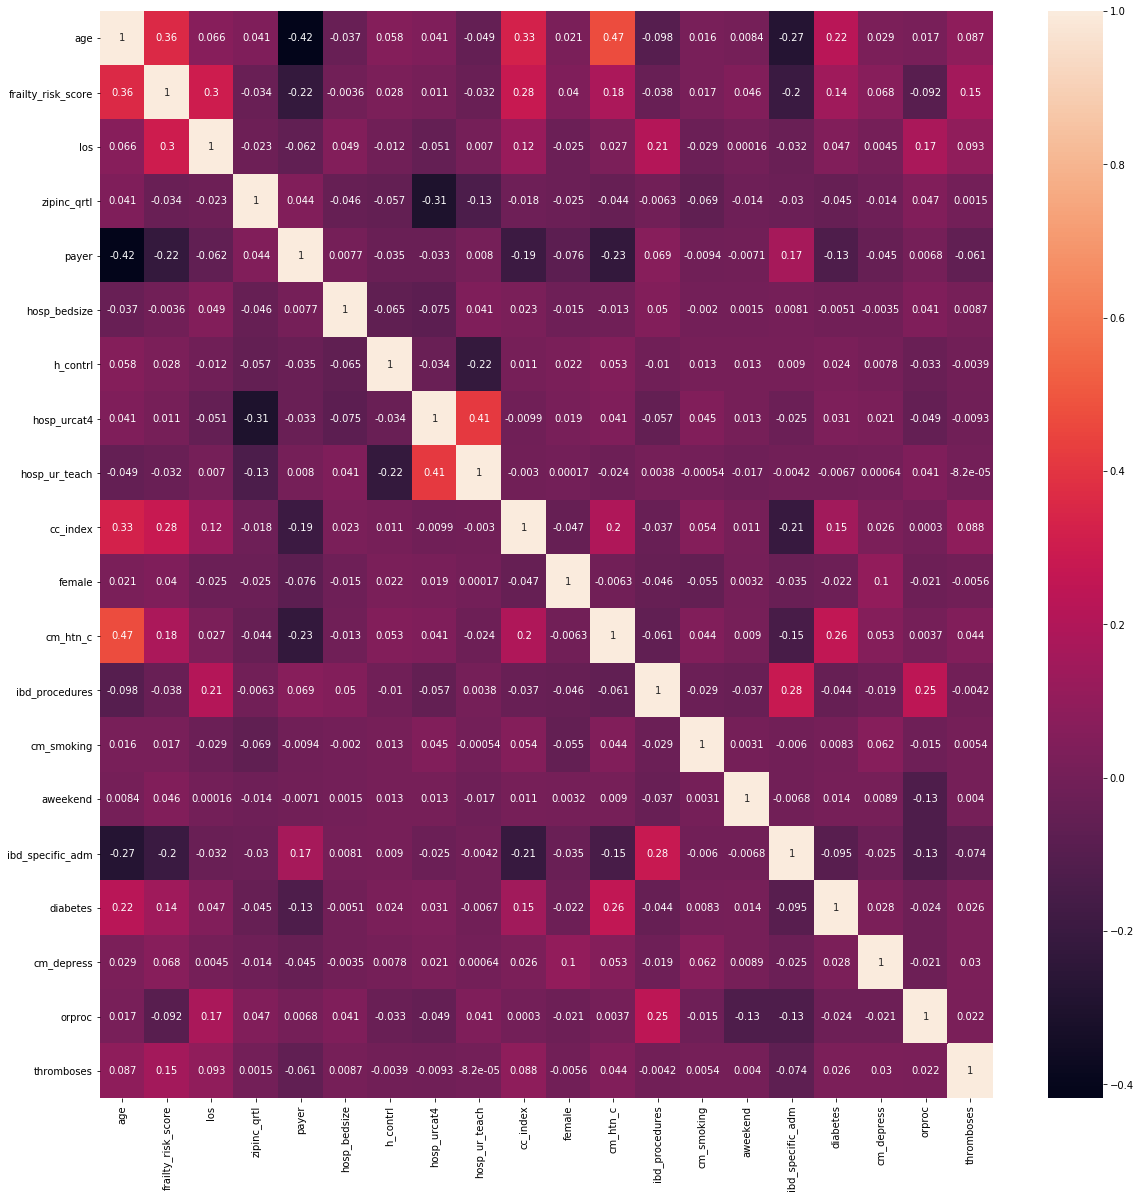

In [83]:
# Generating a heatmap
import seaborn as sn
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [26]:
# Grab outcome/label names after dropping na's/rows with na's
target = cleaned_data["ibd_readm"]
target_names = ["none", "readmitted"]
target = target.astype('int64')
target

0        1
3        0
4        1
9        0
10       0
        ..
94491    0
94492    0
94493    1
94496    0
94497    0
Name: ibd_readm, Length: 46632, dtype: int64

In [27]:
# Grab feature names after dropping na's/rows with na
cleaned_data_wo_outcome = cleaned_data.drop('ibd_readm', axis=1)
featured_names = cleaned_data_wo_outcome.columns
featured_names

Index(['age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'payer',
       'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 'hosp_ur_teach', 'cc_index',
       'female', 'cm_htn_c', 'ibd_procedures', 'cm_smoking', 'aweekend',
       'ibd_specific_adm', 'diabetes', 'cm_depress', 'orproc', 'thromboses'],
      dtype='object')

In [28]:
# Check for na values
cleaned_data_wo_outcome.isnull().sum()

age                   0
frailty_risk_score    0
los                   0
zipinc_qrtl           0
payer                 0
hosp_bedsize          0
h_contrl              0
hosp_urcat4           0
hosp_ur_teach         0
cc_index              0
female                0
cm_htn_c              0
ibd_procedures        0
cm_smoking            0
aweekend              0
ibd_specific_adm      0
diabetes              0
cm_depress            0
orproc                0
thromboses            0
dtype: int64

In [44]:
# Show rows where the null values are
# Data check
# check_data = readm_data_df[['nrd_visitlink', 'ibd_index_hosp', 'ibd_readm', 'age', 'zipinc_qrtl', 'female', 'los', 'pay1', 'new_cc_index', 'frailty_risk_score']]
# check_data[check_data.isna().any(axis=1)]

In [24]:
# # Change one of the variables

# from sklearn.preprocessing import LabelEncoder

# # Step 1: Label-encode data set
# label_encoder = LabelEncoder()
# label_encoder.fit(y)
# encoded_y = label_encoder.transform(y)

### Using traditional train-test split

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE

clf = DecisionTreeClassifier()
trans = RFE(clf, n_features_to_select=20)
data_trans = trans.fit_transform(cleaned_data_wo_outcome, target)
columns_retained_RFECV = cleaned_data.iloc[:, 1:].columns[trans.get_support()].values

In [115]:
columns_retained_RFECV

array(['age', 'female', 'los', 'aweekend', 'payer', 'zipinc_qrtl',
       'cm_anemdef', 'cm_depress', 'cm_htn_c', 'cm_hypothy', 'diabetes',
       'cm_smoking', 'ibd_procedures', 'cc_index', 'frailty_risk_score',
       'h_contrl', 'hosp_bedsize', 'hosp_ur_teach', 'hosp_urcat4',
       'gi_adm'], dtype=object)

In [50]:
columns_retained_RFECV

array(['age', 'female', 'los', 'aweekend', 'payer', 'zipinc_qrtl',
       'cm_anemdef', 'cm_chrnlung', 'cm_depress', 'cm_htn_c',
       'cm_hypothy', 'cm_lytes', 'cm_obese', 'cm_psych', 'cm_wghtloss',
       'diabetes', 'cm_smoking', 'blood_transfusion', 'ibd_procedures',
       'cc_index', 'thromboses', 'unplanned_adm', 'frailty_risk_score',
       'h_contrl', 'hosp_bedsize', 'hosp_ur_teach', 'hosp_urcat4',
       'infxn_adm', 'gi_adm', 'ibd_specific_adm'], dtype=object)

In [103]:
columns_retained_RFECV

array(['age', 'female', 'los', 'aweekend', 'elective', 'orproc', 'payer',
       'zipinc_qrtl', 'cm_alcohol', 'cm_anemdef', 'cm_arth', 'cm_bldloss',
       'cm_chrnlung', 'cm_depress', 'cm_coag', 'cm_dm', 'cm_drug',
       'cm_htn_c', 'cm_hypothy', 'cm_liver', 'cm_lytes', 'cm_neuro',
       'cm_obese', 'cm_perivasc', 'cm_psych', 'cm_renlfail',
       'cm_wghtloss', 'diabetes', 'copd', 'cm_smoking',
       'blood_transfusion', 'ibd_procedures', 'cc_index', 'new_cc_index',
       'thromboses', 'unplanned_adm', 'new_arrhythmia_adm',
       'new_septicemia_adm', 'frailty_risk_score', 'h_contrl',
       'hosp_bedsize', 'hosp_ur_teach', 'hosp_urcat4', 'prevent_readm',
       'cardiac_adm', 'resp_adm', 'infxn_adm', 'gu_adm', 'gi_adm',
       'ibd_specific_adm'], dtype=object)

In [77]:
# Set up training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_data_wo_outcome, target, random_state=42)

In [30]:
# Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=10)
rf.fit(X_train, y_train)

print(f'Training Score: {rf.score(X_train, y_train)}')
print(f'Testing Score: {rf.score(X_test, y_test)}')

Training Score: 0.7042088408532052
Testing Score: 0.621547435237605


In [31]:
# Hyptertuning Parameter
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [5, 10, 15]}
grid = GridSearchCV(rf,param_grid, verbose=3)

In [32]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=5, n_estimators=50 ....................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] ........ max_depth=5, n_estimators=50, score=0.597, total=   1.0s
[CV] max_depth=5, n_estimators=50 ....................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[CV] ........ max_depth=5, n_estimators=50, score=0.602, total=   1.2s
[CV] max_depth=5, n_estimators=50 ....................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s
[CV] ........ max_depth=5, n_estimators=50, score=0.598, total=   1.1s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.606, total=   1.1s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.598, to

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False,
                                              rand

In [33]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 10, 'n_estimators': 150}
0.6121403927761628


In [34]:
# Check the training and testing scores
print(f'Training Score: {grid.score(X_train, y_train)}')
grid.predict(X_test)
print(f'Testing Score: {grid.score(X_test, y_test)}')

Training Score: 0.7016355006576314
Testing Score: 0.6217189912506433


In [35]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.keras.__version__

'2.4.0'

In [36]:

from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

In [57]:
# X_scaler = StandardScaler().fit(X_train)
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_test.shape


(11658, 20)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [78]:
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=20))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(1, activation="sigmoid"))

In [71]:
# model = Sequential()
# model.add(Dense(100, activation='relu', input_dim=X_train_scaled.shape[1]))
# model.add(Dense(200, activation='relu'))
# model.add(Dense(200, activation='relu'))
# model.add(Dense(200, activation='relu'))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(1, activation="sigmoid"))

In [79]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [80]:
model.fit(
    X_train,
    y_train,
    epochs=250,
    shuffle=True,
    verbose=2
)

Epoch 1/250
1093/1093 - 2s - loss: 0.6738 - accuracy: 0.5831
Epoch 2/250
1093/1093 - 2s - loss: 0.6627 - accuracy: 0.5928
Epoch 3/250
1093/1093 - 2s - loss: 0.6610 - accuracy: 0.6003
Epoch 4/250
1093/1093 - 2s - loss: 0.6594 - accuracy: 0.6043
Epoch 5/250
1093/1093 - 2s - loss: 0.6581 - accuracy: 0.6037
Epoch 6/250
1093/1093 - 2s - loss: 0.6578 - accuracy: 0.6052
Epoch 7/250
1093/1093 - 2s - loss: 0.6571 - accuracy: 0.6077
Epoch 8/250
1093/1093 - 2s - loss: 0.6568 - accuracy: 0.6079
Epoch 9/250
1093/1093 - 2s - loss: 0.6559 - accuracy: 0.6100
Epoch 10/250
1093/1093 - 2s - loss: 0.6557 - accuracy: 0.6095
Epoch 11/250
1093/1093 - 2s - loss: 0.6546 - accuracy: 0.6120
Epoch 12/250
1093/1093 - 2s - loss: 0.6542 - accuracy: 0.6089
Epoch 13/250
1093/1093 - 2s - loss: 0.6540 - accuracy: 0.6124
Epoch 14/250
1093/1093 - 3s - loss: 0.6533 - accuracy: 0.6122
Epoch 15/250
1093/1093 - 2s - loss: 0.6529 - accuracy: 0.6124
Epoch 16/250
1093/1093 - 2s - loss: 0.6526 - accuracy: 0.6137
Epoch 17/250
1093

In [82]:
model_loss, model_accuracy = model.evaluate(
    X_test, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

365/365 - 1s - loss: 1.3903 - accuracy: 0.5717
Normal Neural Network - Loss: 1.3903337717056274, Accuracy: 0.5717104077339172


In [512]:
'age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'payer', 'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 'hosp_ur_teach', 'cc_index', 'female', 'cm_htn_c', 'ibd_procedures', 'cm_smoking', 'aweekend', 'cm_anemdef', 'ibd_specific_adm', 'cm_lytes', 'new_cc_index', 'orproc', 

('age',
 'frailty_risk_score',
 'los',
 'zipinc_qrtl',
 'payer',
 'hosp_bedsize',
 'h_contrl',
 'hosp_urcat4',
 'hosp_ur_teach',
 'cc_index',
 'female',
 'cm_htn_c',
 'ibd_procedures',
 'cm_smoking',
 'aweekend',
 'cm_anemdef',
 'ibd_specific_adm',
 'cm_lytes',
 'new_cc_index',
 'orproc')

In [36]:
sorted(zip(rf.feature_importances_, X_train), reverse=True)

[(0.10451191354742422, 'age'),
 (0.0923768150379462, 'frailty_risk_score'),
 (0.07215965207028475, 'los'),
 (0.04350685974438594, 'zipinc_qrtl'),
 (0.030692405482989887, 'payer'),
 (0.02932062803358028, 'hosp_bedsize'),
 (0.028056127624054936, 'h_contrl'),
 (0.027363025479511003, 'hosp_urcat4'),
 (0.025897637918164195, 'hosp_ur_teach'),
 (0.025154220239588045, 'cc_index'),
 (0.021255085183223443, 'female'),
 (0.018770049561693286, 'cm_htn_c'),
 (0.018295152726377443, 'ibd_procedures'),
 (0.018257149156133648, 'cm_smoking'),
 (0.017072292044192215, 'aweekend'),
 (0.015651448290266604, 'cm_anemdef'),
 (0.01541985738890082, 'ibd_specific_adm'),
 (0.015175459203040961, 'cm_lytes'),
 (0.014297190435508159, 'new_cc_index'),
 (0.01408518156019541, 'orproc'),
 (0.013853029045237261, 'cm_depress'),
 (0.013275529153533175, 'gi_adm'),
 (0.0123000911357116, 'cm_hypothy'),
 (0.01161051235501522, 'blood_transfusion'),
 (0.011399334140171772, 'cm_obese'),
 (0.01100090009130918, 'cm_wghtloss'),
 (0.01

In [834]:
sorted(zip(rf.feature_importances_, X_train), reverse=True)

[(0.13766917989327618, 'frailty_risk_score'),
 (0.1359961998206415, 'los'),
 (0.13507680884102252, 'age'),
 (0.09387725149400444, 'cc_index'),
 (0.08476813911015595, 'payer'),
 (0.046169293222443335, 'orproc'),
 (0.039120190795576264, 'zipinc_qrtl'),
 (0.029733120094451785, 'hosp_urcat4'),
 (0.029673865727544324, 'h_contrl'),
 (0.02779751207595697, 'hosp_bedsize'),
 (0.026768295537036465, 'ibd_procedures'),
 (0.026446152392125957, 'severe_IBD_hospitalization'),
 (0.025945236727673276, 'hosp_ur_teach'),
 (0.02560192735477283, 'ibd_specific_adm'),
 (0.021237431945445338, 'thromboses'),
 (0.02033814214208014, 'female'),
 (0.01988994176390486, 'diabetes'),
 (0.019661135397823323, 'cm_depress'),
 (0.018686907391597327, 'cm_smoking'),
 (0.01818264510781728, 'cm_htn_c'),
 (0.017360623164649796, 'aweekend')]

In [732]:
'age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'payer', 'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 'hosp_ur_teach', 'cc_index', 'female', 'ibd_surgery_adm', 'ibd_procedures', 'cm_smoking', 'thromboses', 'severe_IBD_hospitalization', 'ibd_specific_adm', 'diabetes', 'cm_depress', 'orproc' 

('age',
 'frailty_risk_score',
 'los',
 'zipinc_qrtl',
 'payer',
 'hosp_bedsize',
 'h_contrl',
 'hosp_urcat4',
 'hosp_ur_teach',
 'cc_index',
 'female',
 'new_pneumonia_adm',
 'ibd_procedures',
 'cm_smoking',
 'thromboses',
 'severe_IBD_hospitalization',
 'ibd_specific_adm',
 'diabetes',
 'cm_depress',
 'orproc')

In [53]:
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics
scores = cross_val_score(rf, X_test, y_test, cv=10, scoring='accuracy')
print(scores)

[0.62435678 0.60634648 0.61234991 0.60977702 0.62264151 0.61578045
 0.60891938 0.60120069 0.6        0.59914163]


In [25]:
# # Build the random forrest classifier

# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

### Using k-fold cross-validation

In [56]:
# K-fold validation
# Build the decision tree first

# clf = tree.DecisionTreeClassifier(splitter = "best", max_features = "auto", max_depth = 6)
# clf = tree.DecisionTreeClassifier(splitter = "best", criterion = "entropy", max_depth = 6)
clf = tree.DecisionTreeClassifier(splitter = "best", max_depth = 6)

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics
scores = cross_val_score(clf, cleaned_data_wo_outcome, target, cv=10, scoring='accuracy')
print(scores)

[0.60334477 0.60763293 0.61484023 0.59725499 0.60626206 0.60862106
 0.60304525 0.61634141 0.61162342 0.61205233]


In [ ]:
# # Fit the model on the test dataset and evaluate the output

# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=200)
# rf = rf.fit(X_train, y_train)
# rf.score(X_test, y_test)

In [ ]:
# # Evaluate the features of the model

# sorted(zip(rf.feature_importances_, featured_names), reverse=True)

### Using logistic regression

In [29]:
# Using logistic regression and k-fold validation
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

scores = cross_val_score(classifier, cleaned_data_wo_outcome, target, cv=10,scoring='accuracy')
print(scores)

[0.61729985 0.61493883 0.61257781 0.61558274 0.60399227 0.61772913
 0.60626878 0.61592958 0.61678832 0.61936453]


### Using support vector machine 

In [57]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.594


In [ ]:
# # Calculate classification report
# from sklearn.metrics import classification_report
# predictions = model.predict(X_test)
# print(classification_report(y_test, predictions,
#                             target_names=target_names))

In [ ]:
# from sklearn import tree
# import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                   feature_names=new_feature_names,  
#                       class_names=target_names,  
#                       filled=True, rounded=True)  
# #                      special_characters=False)

# graph = graphviz.Source(dot_data)  
# graph 